https://medium.com/@connectwithghosh/simple-autoencoder-example-using-tensorflow-in-python-on-the-fashion-mnist-dataset-eee63b8ed9f1
http://localhost:8889/?token=3e8edb98cb8f87051060a279a40ae5f7871f8501e7ed66a9&token=3e8edb98cb8f87051060a279a40ae5f7871f8501e7ed66a9

In [1]:
# Importing tensorflow
import tensorflow as tf
# Importing some more libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the images
all_images = np.loadtxt('./data/autoencoder/fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]

#looking at the shape of the file
print(all_images.shape)

(60000, 784)


and the actual image looks like


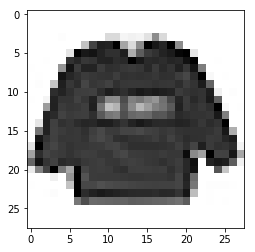

In [3]:
# printing the array representation of the first image
#print("the array of the first image looks like", all_images[0])

# printing something that actually looks like an image
print("and the actual image looks like")
plt.imshow(all_images[0].reshape(28,28),  cmap='Greys')
plt.show()

In [4]:
# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}


In [5]:
#Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [6]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [7]:
# Training Parameters
#learning_rate = 0.01
learning_rate = 0.01

In [8]:
# image with shape 784 goes in
X = tf.placeholder('float', [None, 784])

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)


#Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# define our cost function
meansq = tf.reduce_mean(tf.square(y_true - y_pred))

# optimizer methods 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(meansq)
#optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(meansq)

In [9]:
# initialising stuff and starting the session

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# defining bath size, number of epochs and learning rate
batch_size = 100 
total_epochs = 2000
tot_images = 60000

# running the model for a 1000 epochs taking 100 images in batches
# total improvement is printed out after each epoch
for epoch in range(total_epochs):
    epoch_loss = 0
    for i in range(int(tot_images/batch_size)):
        epoch_x = all_images[i*batch_size : (i+1)*batch_size]    
        _, c = sess.run([optimizer, meansq], feed_dict={X:epoch_x, 
                                                        y_true:epoch_x})
        epoch_loss += c
    
    print('Epoch', epoch, '/', total_epochs, 'loss:', epoch_loss)    
    

Epoch 0 / 2000 loss: 7964455.1533203125
Epoch 1 / 2000 loss: 7963737.7197265625
Epoch 2 / 2000 loss: 7963715.033203125
Epoch 3 / 2000 loss: 7963420.384765625
Epoch 4 / 2000 loss: 7963258.6533203125
Epoch 5 / 2000 loss: 7963258.31640625
Epoch 6 / 2000 loss: 7963258.3486328125
Epoch 7 / 2000 loss: 7963258.39453125
Epoch 8 / 2000 loss: 7963258.677734375
Epoch 9 / 2000 loss: 7963258.171875
Epoch 10 / 2000 loss: 7963258.1044921875
Epoch 11 / 2000 loss: 7963258.443359375
Epoch 12 / 2000 loss: 7963258.9697265625
Epoch 13 / 2000 loss: 7963259.8623046875
Epoch 14 / 2000 loss: 7963259.54296875
Epoch 15 / 2000 loss: 7963259.9013671875
Epoch 16 / 2000 loss: 7963259.9345703125
Epoch 17 / 2000 loss: 7963259.9345703125
Epoch 18 / 2000 loss: 7963259.9345703125
Epoch 19 / 2000 loss: 7963259.9345703125
Epoch 20 / 2000 loss: 7963259.9345703125
Epoch 21 / 2000 loss: 7963259.9345703125
Epoch 22 / 2000 loss: 7963260.3076171875
Epoch 23 / 2000 loss: 7963260.3115234375
Epoch 24 / 2000 loss: 7963260.201171875


Epoch 203 / 2000 loss: 7963258.111328125
Epoch 204 / 2000 loss: 7963258.111328125
Epoch 205 / 2000 loss: 7963258.111328125
Epoch 206 / 2000 loss: 7963258.111328125
Epoch 207 / 2000 loss: 7963258.111328125
Epoch 208 / 2000 loss: 7963258.111328125
Epoch 209 / 2000 loss: 7963258.111328125
Epoch 210 / 2000 loss: 7963258.111328125
Epoch 211 / 2000 loss: 7963258.111328125
Epoch 212 / 2000 loss: 7963258.111328125
Epoch 213 / 2000 loss: 7963258.111328125
Epoch 214 / 2000 loss: 7963258.111328125
Epoch 215 / 2000 loss: 7963258.111328125
Epoch 216 / 2000 loss: 7963258.111328125
Epoch 217 / 2000 loss: 7963258.111328125
Epoch 218 / 2000 loss: 7963258.111328125
Epoch 219 / 2000 loss: 7963258.111328125
Epoch 220 / 2000 loss: 7963258.111328125
Epoch 221 / 2000 loss: 7963258.111328125
Epoch 222 / 2000 loss: 7963258.111328125
Epoch 223 / 2000 loss: 7963258.111328125
Epoch 224 / 2000 loss: 7963258.111328125
Epoch 225 / 2000 loss: 7963258.111328125
Epoch 226 / 2000 loss: 7963258.111328125
Epoch 227 / 2000

Epoch 403 / 2000 loss: 7963258.111328125
Epoch 404 / 2000 loss: 7963258.111328125
Epoch 405 / 2000 loss: 7963258.111328125
Epoch 406 / 2000 loss: 7963258.111328125
Epoch 407 / 2000 loss: 7963258.111328125
Epoch 408 / 2000 loss: 7963258.111328125
Epoch 409 / 2000 loss: 7963258.111328125
Epoch 410 / 2000 loss: 7963258.111328125
Epoch 411 / 2000 loss: 7963258.111328125
Epoch 412 / 2000 loss: 7963258.111328125
Epoch 413 / 2000 loss: 7963258.111328125
Epoch 414 / 2000 loss: 7963258.111328125
Epoch 415 / 2000 loss: 7963258.111328125
Epoch 416 / 2000 loss: 7963258.111328125
Epoch 417 / 2000 loss: 7963258.111328125
Epoch 418 / 2000 loss: 7963258.111328125
Epoch 419 / 2000 loss: 7963258.111328125
Epoch 420 / 2000 loss: 7963258.111328125
Epoch 421 / 2000 loss: 7963258.111328125
Epoch 422 / 2000 loss: 7963258.111328125
Epoch 423 / 2000 loss: 7963258.111328125
Epoch 424 / 2000 loss: 7963258.111328125
Epoch 425 / 2000 loss: 7963258.111328125
Epoch 426 / 2000 loss: 7963258.111328125
Epoch 427 / 2000

Epoch 603 / 2000 loss: 7963258.111328125
Epoch 604 / 2000 loss: 7963258.111328125
Epoch 605 / 2000 loss: 7963258.111328125
Epoch 606 / 2000 loss: 7963258.111328125
Epoch 607 / 2000 loss: 7963258.111328125
Epoch 608 / 2000 loss: 7963258.111328125
Epoch 609 / 2000 loss: 7963258.111328125
Epoch 610 / 2000 loss: 7963258.111328125
Epoch 611 / 2000 loss: 7963258.111328125
Epoch 612 / 2000 loss: 7963258.111328125
Epoch 613 / 2000 loss: 7963258.111328125
Epoch 614 / 2000 loss: 7963258.111328125
Epoch 615 / 2000 loss: 7963258.111328125
Epoch 616 / 2000 loss: 7963258.111328125
Epoch 617 / 2000 loss: 7963258.111328125
Epoch 618 / 2000 loss: 7963258.111328125
Epoch 619 / 2000 loss: 7963258.111328125
Epoch 620 / 2000 loss: 7963258.111328125
Epoch 621 / 2000 loss: 7963258.111328125
Epoch 622 / 2000 loss: 7963258.111328125
Epoch 623 / 2000 loss: 7963258.111328125
Epoch 624 / 2000 loss: 7963258.111328125
Epoch 625 / 2000 loss: 7963258.111328125
Epoch 626 / 2000 loss: 7963258.111328125
Epoch 627 / 2000

Epoch 803 / 2000 loss: 7963258.111328125
Epoch 804 / 2000 loss: 7963258.111328125
Epoch 805 / 2000 loss: 7963258.111328125
Epoch 806 / 2000 loss: 7963258.111328125
Epoch 807 / 2000 loss: 7963258.111328125
Epoch 808 / 2000 loss: 7963258.111328125
Epoch 809 / 2000 loss: 7963258.111328125
Epoch 810 / 2000 loss: 7963258.111328125
Epoch 811 / 2000 loss: 7963258.111328125
Epoch 812 / 2000 loss: 7963258.111328125
Epoch 813 / 2000 loss: 7963258.111328125
Epoch 814 / 2000 loss: 7963258.111328125
Epoch 815 / 2000 loss: 7963258.111328125
Epoch 816 / 2000 loss: 7963258.111328125
Epoch 817 / 2000 loss: 7963258.111328125
Epoch 818 / 2000 loss: 7963258.111328125
Epoch 819 / 2000 loss: 7963258.111328125
Epoch 820 / 2000 loss: 7963258.111328125
Epoch 821 / 2000 loss: 7963258.111328125
Epoch 822 / 2000 loss: 7963258.111328125
Epoch 823 / 2000 loss: 7963258.111328125
Epoch 824 / 2000 loss: 7963258.111328125
Epoch 825 / 2000 loss: 7963258.111328125
Epoch 826 / 2000 loss: 7963258.111328125
Epoch 827 / 2000

Epoch 1003 / 2000 loss: 7963258.111328125
Epoch 1004 / 2000 loss: 7963258.111328125
Epoch 1005 / 2000 loss: 7963258.111328125
Epoch 1006 / 2000 loss: 7963258.111328125
Epoch 1007 / 2000 loss: 7963258.111328125
Epoch 1008 / 2000 loss: 7963258.111328125
Epoch 1009 / 2000 loss: 7963258.111328125
Epoch 1010 / 2000 loss: 7963258.111328125
Epoch 1011 / 2000 loss: 7963258.111328125
Epoch 1012 / 2000 loss: 7963258.111328125
Epoch 1013 / 2000 loss: 7963258.111328125
Epoch 1014 / 2000 loss: 7963258.111328125
Epoch 1015 / 2000 loss: 7963258.111328125
Epoch 1016 / 2000 loss: 7963258.111328125
Epoch 1017 / 2000 loss: 7963258.111328125
Epoch 1018 / 2000 loss: 7963258.111328125
Epoch 1019 / 2000 loss: 7963258.111328125
Epoch 1020 / 2000 loss: 7963258.111328125
Epoch 1021 / 2000 loss: 7963258.111328125
Epoch 1022 / 2000 loss: 7963258.111328125
Epoch 1023 / 2000 loss: 7963258.111328125
Epoch 1024 / 2000 loss: 7963258.111328125
Epoch 1025 / 2000 loss: 7963258.111328125
Epoch 1026 / 2000 loss: 7963258.11

Epoch 1199 / 2000 loss: 7963258.111328125
Epoch 1200 / 2000 loss: 7963258.111328125
Epoch 1201 / 2000 loss: 7963258.111328125
Epoch 1202 / 2000 loss: 7963258.111328125
Epoch 1203 / 2000 loss: 7963258.111328125
Epoch 1204 / 2000 loss: 7963258.111328125
Epoch 1205 / 2000 loss: 7963258.111328125
Epoch 1206 / 2000 loss: 7963258.111328125
Epoch 1207 / 2000 loss: 7963258.111328125
Epoch 1208 / 2000 loss: 7963258.111328125
Epoch 1209 / 2000 loss: 7963258.111328125
Epoch 1210 / 2000 loss: 7963258.111328125
Epoch 1211 / 2000 loss: 7963258.111328125
Epoch 1212 / 2000 loss: 7963258.111328125
Epoch 1213 / 2000 loss: 7963258.111328125
Epoch 1214 / 2000 loss: 7963258.111328125
Epoch 1215 / 2000 loss: 7963258.111328125
Epoch 1216 / 2000 loss: 7963258.111328125
Epoch 1217 / 2000 loss: 7963258.111328125
Epoch 1218 / 2000 loss: 7963258.111328125
Epoch 1219 / 2000 loss: 7963258.111328125
Epoch 1220 / 2000 loss: 7963258.111328125
Epoch 1221 / 2000 loss: 7963258.111328125
Epoch 1222 / 2000 loss: 7963258.11

Epoch 1402 / 2000 loss: 7963113.828125
Epoch 1403 / 2000 loss: 7963113.828125
Epoch 1404 / 2000 loss: 7963113.828125
Epoch 1405 / 2000 loss: 7963113.828125
Epoch 1406 / 2000 loss: 7963113.828125
Epoch 1407 / 2000 loss: 7963113.828125
Epoch 1408 / 2000 loss: 7963113.828125
Epoch 1409 / 2000 loss: 7963113.828125
Epoch 1410 / 2000 loss: 7963113.828125
Epoch 1411 / 2000 loss: 7963113.828125
Epoch 1412 / 2000 loss: 7963113.828125
Epoch 1413 / 2000 loss: 7963113.828125
Epoch 1414 / 2000 loss: 7963113.828125
Epoch 1415 / 2000 loss: 7963113.828125
Epoch 1416 / 2000 loss: 7963113.828125
Epoch 1417 / 2000 loss: 7963113.828125
Epoch 1418 / 2000 loss: 7963113.828125
Epoch 1419 / 2000 loss: 7963113.828125
Epoch 1420 / 2000 loss: 7963113.828125
Epoch 1421 / 2000 loss: 7963113.828125
Epoch 1422 / 2000 loss: 7963113.828125
Epoch 1423 / 2000 loss: 7963113.828125
Epoch 1424 / 2000 loss: 7963113.828125
Epoch 1425 / 2000 loss: 7963113.828125
Epoch 1426 / 2000 loss: 7963113.828125
Epoch 1427 / 2000 loss: 7

Epoch 1612 / 2000 loss: 7963080.4619140625
Epoch 1613 / 2000 loss: 7963080.4619140625
Epoch 1614 / 2000 loss: 7963080.4619140625
Epoch 1615 / 2000 loss: 7963080.4619140625
Epoch 1616 / 2000 loss: 7963080.4619140625
Epoch 1617 / 2000 loss: 7963080.4619140625
Epoch 1618 / 2000 loss: 7963080.4619140625
Epoch 1619 / 2000 loss: 7963080.4619140625
Epoch 1620 / 2000 loss: 7963080.4619140625
Epoch 1621 / 2000 loss: 7963080.4619140625
Epoch 1622 / 2000 loss: 7963080.4619140625
Epoch 1623 / 2000 loss: 7963080.4619140625
Epoch 1624 / 2000 loss: 7963080.4619140625
Epoch 1625 / 2000 loss: 7963080.4619140625
Epoch 1626 / 2000 loss: 7963080.4619140625
Epoch 1627 / 2000 loss: 7963080.4619140625
Epoch 1628 / 2000 loss: 7963080.4619140625
Epoch 1629 / 2000 loss: 7963080.4619140625
Epoch 1630 / 2000 loss: 7963080.4619140625
Epoch 1631 / 2000 loss: 7963080.4619140625
Epoch 1632 / 2000 loss: 7963080.4619140625
Epoch 1633 / 2000 loss: 7963080.4619140625
Epoch 1634 / 2000 loss: 7963080.4619140625
Epoch 1635 

Epoch 1803 / 2000 loss: 7963080.4619140625
Epoch 1804 / 2000 loss: 7963080.4619140625
Epoch 1805 / 2000 loss: 7963080.4619140625
Epoch 1806 / 2000 loss: 7963080.4619140625
Epoch 1807 / 2000 loss: 7963080.4619140625
Epoch 1808 / 2000 loss: 7963080.4619140625
Epoch 1809 / 2000 loss: 7963080.4619140625
Epoch 1810 / 2000 loss: 7963080.4619140625
Epoch 1811 / 2000 loss: 7963080.4619140625
Epoch 1812 / 2000 loss: 7963080.4619140625
Epoch 1813 / 2000 loss: 7963080.4619140625
Epoch 1814 / 2000 loss: 7963080.4619140625
Epoch 1815 / 2000 loss: 7963080.4619140625
Epoch 1816 / 2000 loss: 7963080.4619140625
Epoch 1817 / 2000 loss: 7963080.4619140625
Epoch 1818 / 2000 loss: 7963080.4619140625
Epoch 1819 / 2000 loss: 7963080.4619140625
Epoch 1820 / 2000 loss: 7963080.4619140625
Epoch 1821 / 2000 loss: 7963080.4619140625
Epoch 1822 / 2000 loss: 7963080.4619140625
Epoch 1823 / 2000 loss: 7963080.4619140625
Epoch 1824 / 2000 loss: 7963080.4619140625
Epoch 1825 / 2000 loss: 7963080.4619140625
Epoch 1826 

Epoch 1994 / 2000 loss: 7963080.4619140625
Epoch 1995 / 2000 loss: 7963080.4619140625
Epoch 1996 / 2000 loss: 7963080.4619140625
Epoch 1997 / 2000 loss: 7963080.4619140625
Epoch 1998 / 2000 loss: 7963080.4619140625
Epoch 1999 / 2000 loss: 7963080.4619140625


In [12]:
# pick any image
test_image = all_images[999]
# run it though the autoencoder
output_test_image = sess.run(y_true, feed_dict={X:[test_image]})
# run it though just the encoder
encoded_any_image = sess.run(encoder_op, feed_dict={X:[test_image]})

# print the encoding
print(encoded_any_image)

[[1.38296969e-07 9.54547691e-11 7.62333079e-12 1.00000000e+00
  2.54728747e-07 1.00000000e+00 1.06476730e-10 1.00000000e+00
  1.00000000e+00 1.30081179e-16 4.64761042e-13 9.99997258e-01
  1.00000000e+00 1.00000000e+00 7.95937751e-14 9.99977469e-01
  1.00000000e+00 4.28705069e-04 3.84564044e-13 1.00000000e+00
  7.36364484e-23 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.14275895e-08 1.00000000e+00 1.00000000e+00 9.99999404e-01
  5.21507019e-18 1.69040537e-09 1.47743993e-14 1.84672818e-21
  1.00000000e+00 5.17910983e-17 3.58079251e-06 1.37040035e-06
  1.98104357e-16 1.31254247e-13 1.21725661e-08 1.00000000e+00
  9.99999762e-01 2.02334982e-10 1.00000000e+00 2.79006657e-12
  1.84988565e-07 1.00000000e+00 7.33041497e-06 4.17093106e-05
  1.00000000e+00 1.68723635e-27 9.50946433e-10 9.99999642e-01
  1.24259505e-10 1.00000000e+00 1.00000000e+00 1.00000000e+00
  9.99993205e-01 1.00000000e+00 1.46906505e-08 2.39958812e-12
  1.52184461e-35 1.00000000e+00 6.74070520e-07 1.00000000e+00
  1.0000

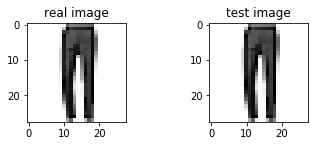

In [14]:
plt.subplot(2,2,1)
plt.imshow(test_image.reshape(28,28), cmap='Greys')
plt.title('real image')

plt.subplot(2,2,2)
plt.imshow(output_test_image.reshape(28,28), cmap='Greys')
plt.title('test image')

plt.show()